In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz


In Internet marketing, click-through rate (CTR) is a metric that measures the number of clicks advertisers receive on their ads per number of impressions.
Mobile has become seamless with all channels, and mobile is the driving force with what’s driving all commerce. Mobile ads are expected to generate $1.08 billion this year, which would be a 122% jump from last year.
In this research analysis, Criteo Labs is sharing 10 days’ worth of Avazu data for us to develop models predicting ad click-through rate (CTR). Given a user and the page he (or she) is visiting. what is the probability that he (or she) will click on a given ad? The goal of this analysis is to benchmark the most accurate ML algorithms for CTR estimation.

In [2]:
import numpy as np
import random
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 
import warnings
warnings.filterwarnings('ignore')

types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}

In [3]:
import pandas as pd
import gzip

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open("/kaggle/input/avazu-ctr-prediction/train.gz") as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
1,10000640724480838376,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
2,10007163879183388340,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
3,1001139595064240144,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
4,10020492815188881068,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79


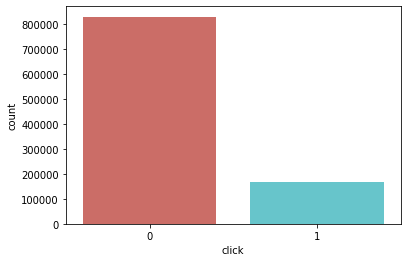

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='click',data=train, palette='hls')
plt.show()

In [5]:
train['click'].value_counts()/len(train)


0    0.830747
1    0.169253
Name: click, dtype: float64

In [6]:
# So,the columns are categorical with high number of varied values, where as the anonymised columns are int
for col in train:
    print (col.ljust(15),train.dtypes[col], train[col].nunique())

id              uint64 1000000
click           int64 2
hour            datetime64[ns] 240
C1              int64 7
banner_pos      int64 7
site_id         object 2646
site_domain     object 2842
site_category   object 22
app_id          object 3071
app_domain      object 200
app_category    object 25
device_id       object 150041
device_ip       object 556323
device_model    object 5179
device_type     int64 5
device_conn_type int64 4
C14             int64 2238
C15             int64 8
C16             int64 9
C17             int64 420
C18             int64 4
C19             int64 65
C20             int64 164
C21             int64 60


### Exploratory Data Analysis

#### How does CTR vary with respect to time?

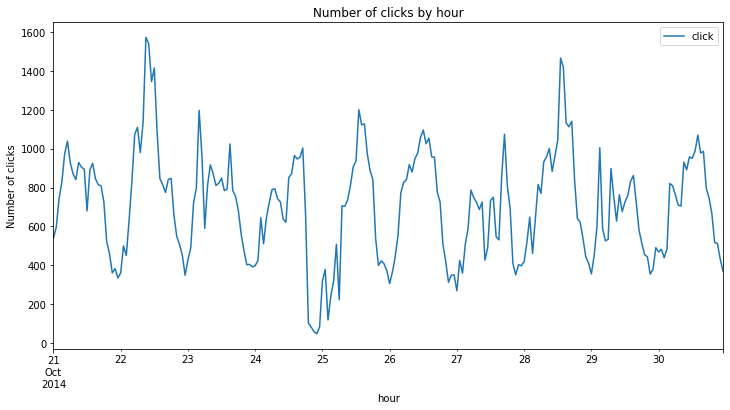

In [7]:
# The data covers 10 days of click streams data from 2014–10–21 to 2014–10–30, that is 240 hours.
# The hourly clicks pattern looks pretty similar every day. However, there were a couple of peak hours, 
# one is sometime in the mid of the day on Oct 22, and another is sometime in the 
# mid of the day on Oct 28. And one very low click hour is close to mid-night on Oct 24.

train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

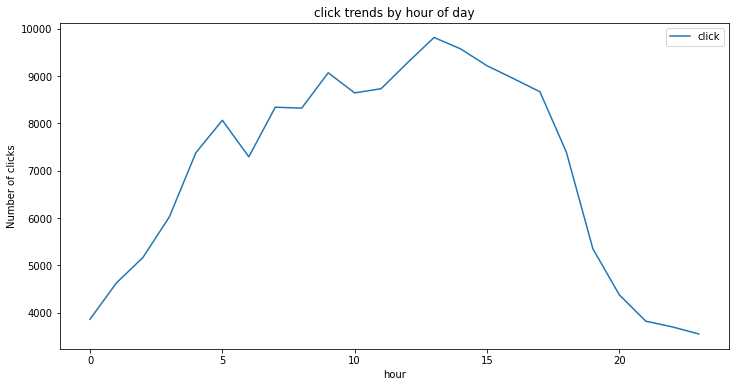

In [8]:
# If we check on individual hour for each day, we see that 11 am to 3 pm has the peak clicks
train.groupby( train["hour"].dt.hour).agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

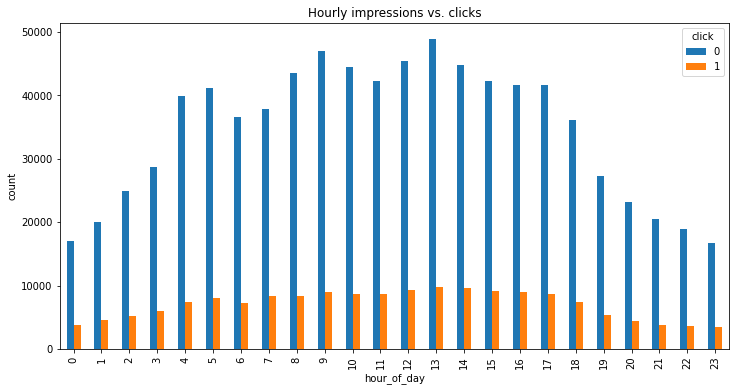

In [9]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

#### Hourly CTR

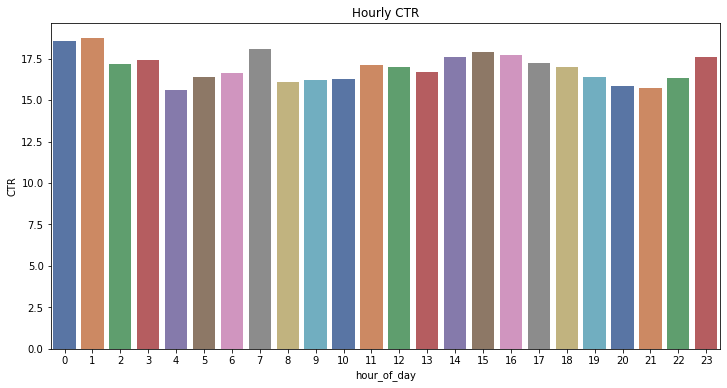

In [10]:
import seaborn as sns
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour,  palette="deep")
plt.title('Hourly CTR');

# One of the interesting observations here is that the highest CTR happened in the hour of mid-night, 1, 7 and 15.
# If you remember, around mid-night has the least number of impressions and clicks.

#### Day of week

Text(0.5, 1.0, 'click trends by day of week')

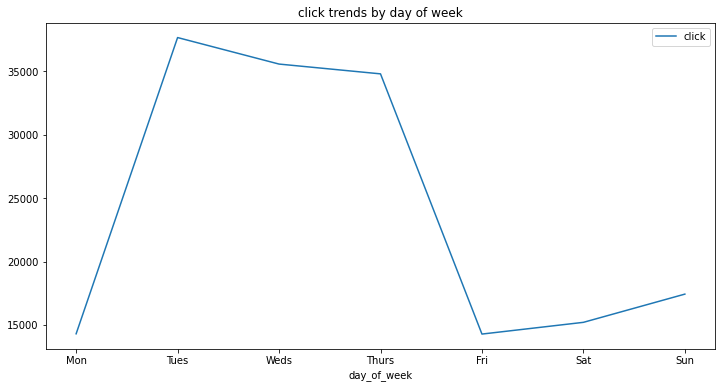

In [11]:
train['day_of_week'] = train['hour'].apply(lambda val: val.strftime("%A"))
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')

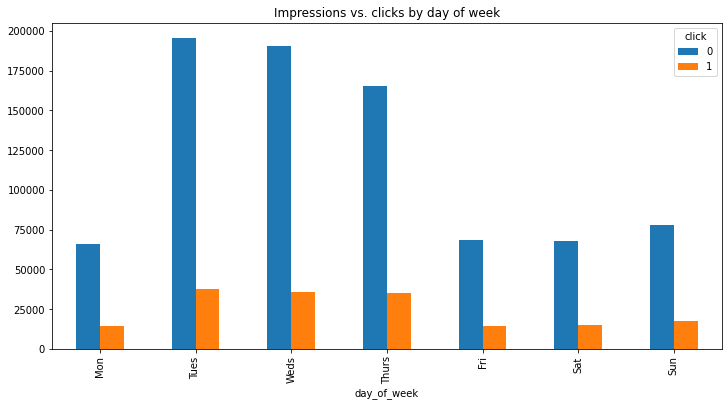

In [12]:
# Tuesdays have the most number of impressions and clicks, then Wednesdays, followed by Thursdays. 
#Mondays and Fridays have the least number of impressions and clicks.

train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

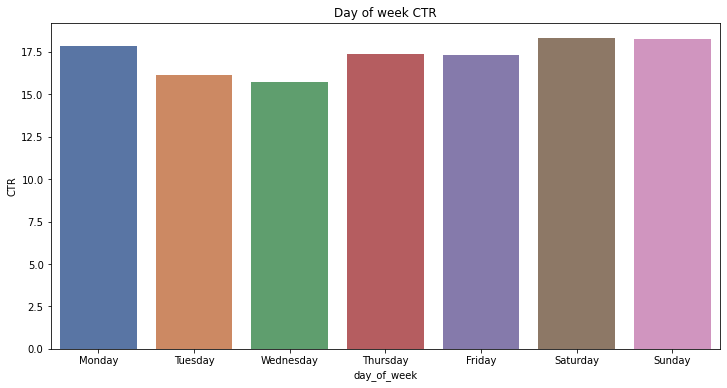

In [13]:
# While Tuesdays and Wednesdays have the highest number of impressions and clicks,
#their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.

df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],\
            palette="deep")
plt.title('Day of week CTR');

#### C1 Feature

In [14]:
# C1 is one of the anonymized categorical features. Although we don’t know its meaning, we still want to take a look its distribution.

print(train.C1.value_counts()/len(train))

# C1 value = 1005 has the most data, almost 92% of all the data we are using. 
# Let’s see whether we can find value of C1 indicates something about CTR.

1005    0.918987
1002    0.054764
1010    0.022240
1012    0.002743
1007    0.000886
1001    0.000234
1008    0.000146
Name: C1, dtype: float64


In [15]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.042735042735042736
for C1 value: 1002,  click through rate: 0.20917025783361332
for C1 value: 1005,  click through rate: 0.16874993879129954
for C1 value: 1007,  click through rate: 0.034988713318284424
for C1 value: 1008,  click through rate: 0.18493150684931506
for C1 value: 1010,  click through rate: 0.09653776978417267
for C1 value: 1012,  click through rate: 0.1837404301859278


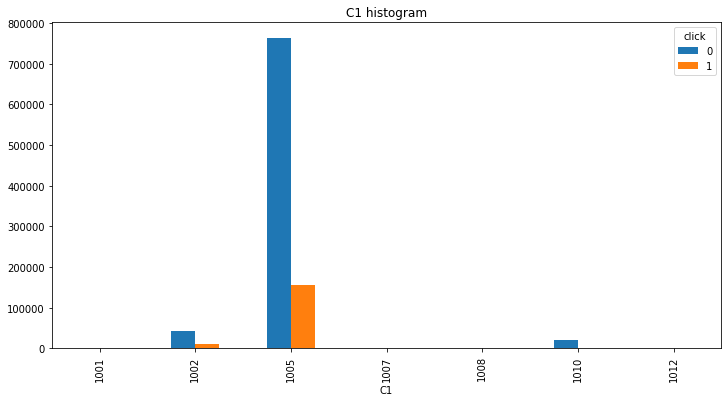

In [16]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

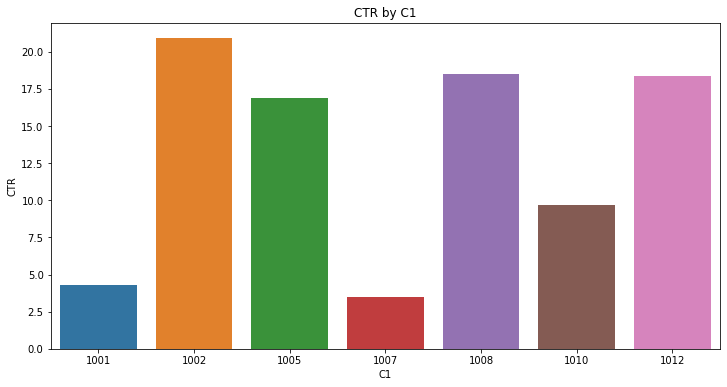

In [17]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

#### Banner position

In [18]:
# I have heard that there are many factors that affect the performance of your banner ads, 
# but the most influential one is the banner position

print(train.banner_pos.value_counts()/len(train))


0    0.719267
1    0.279008
7    0.001036
2    0.000318
4    0.000181
5    0.000146
3    0.000044
Name: banner_pos, dtype: float64


In [19]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16371250175525917
for banner position: 1,  click through rate: 0.18291948617960777
for banner position: 2,  click through rate: 0.11949685534591195
for banner position: 3,  click through rate: 0.29545454545454547
for banner position: 4,  click through rate: 0.16574585635359115
for banner position: 5,  click through rate: 0.18493150684931506
for banner position: 7,  click through rate: 0.3436293436293436


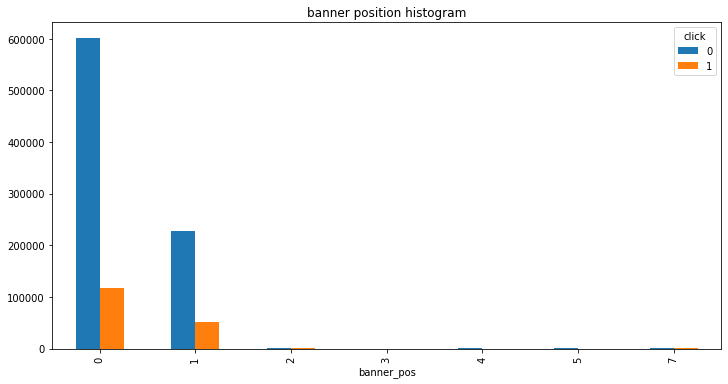

In [20]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

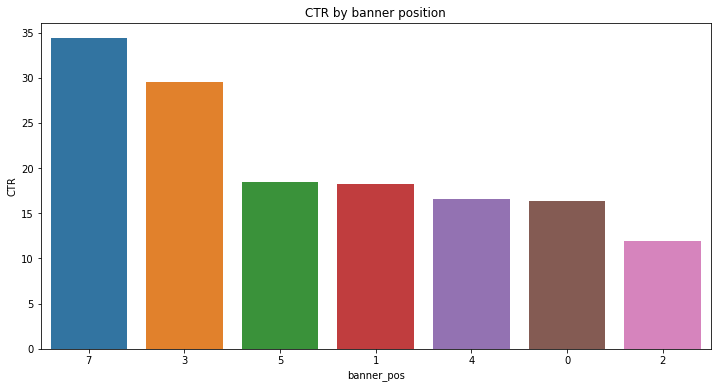

In [21]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

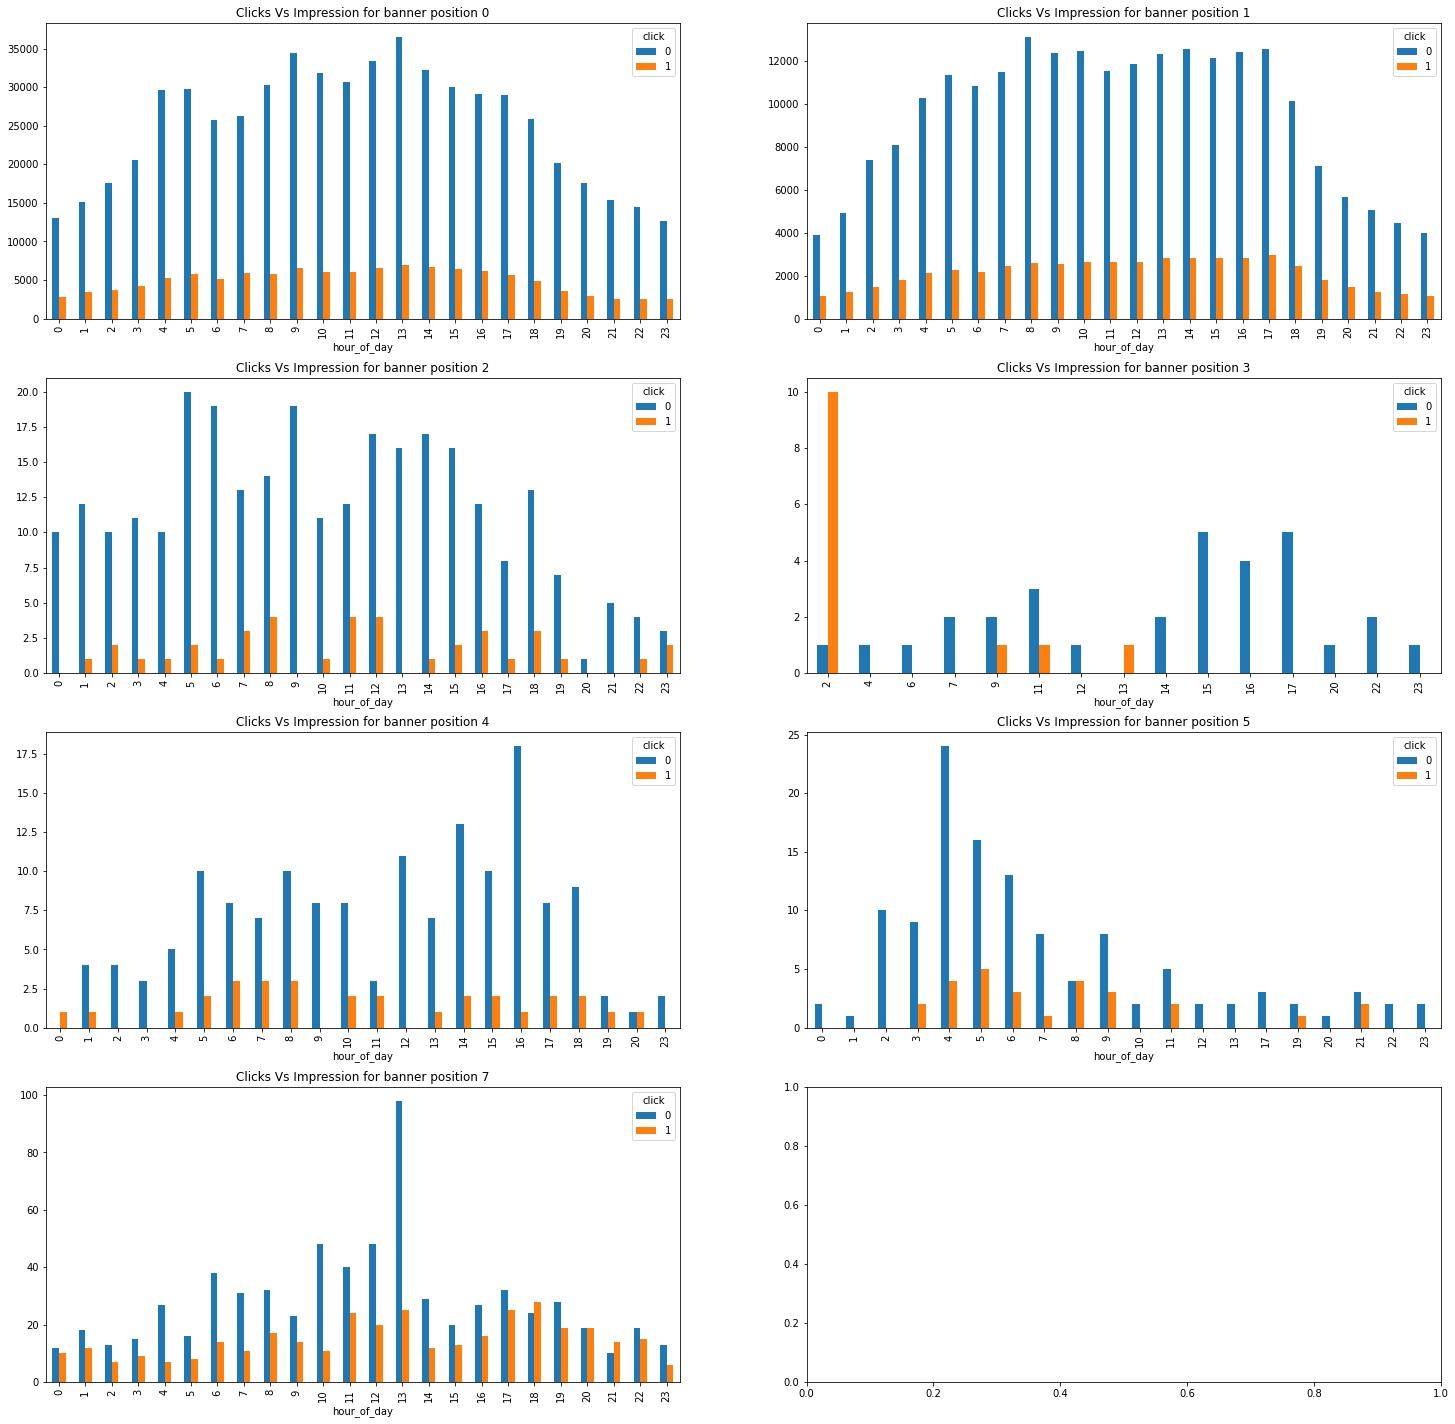

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(25, 25))
axes = axes.flatten()

for i,j in zip(banner_pos,axes):
    df = train[train["banner_pos"]==i]
    df=df.groupby(['hour_of_day', 'click']).size().unstack()
    df.plot(kind="bar",ax=j)
        
    j.set_title("Clicks Vs Impression for banner position " + str(i))

#### Device Type

In [23]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.922995
0    0.054764
4    0.018977
5    0.003263
2    0.000001
Name: device_type, dtype: float64


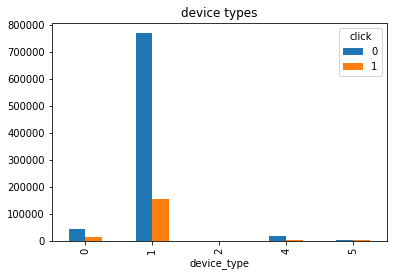

In [24]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

# Device type 1 gets the most impressions and clicks, and the other device types only get the minimum impressions and clicks. 
#We may want to look in more details about device type 1.

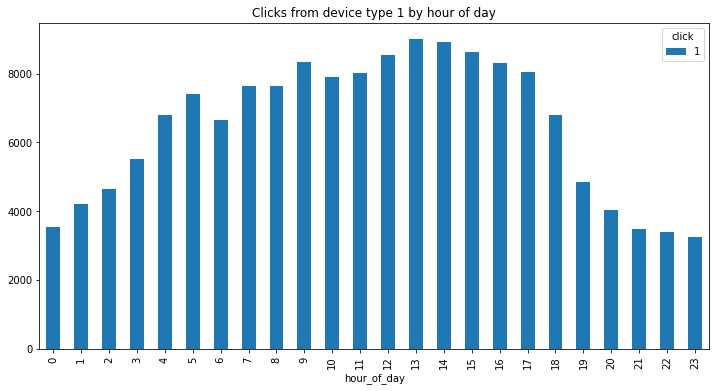

In [25]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().\
plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

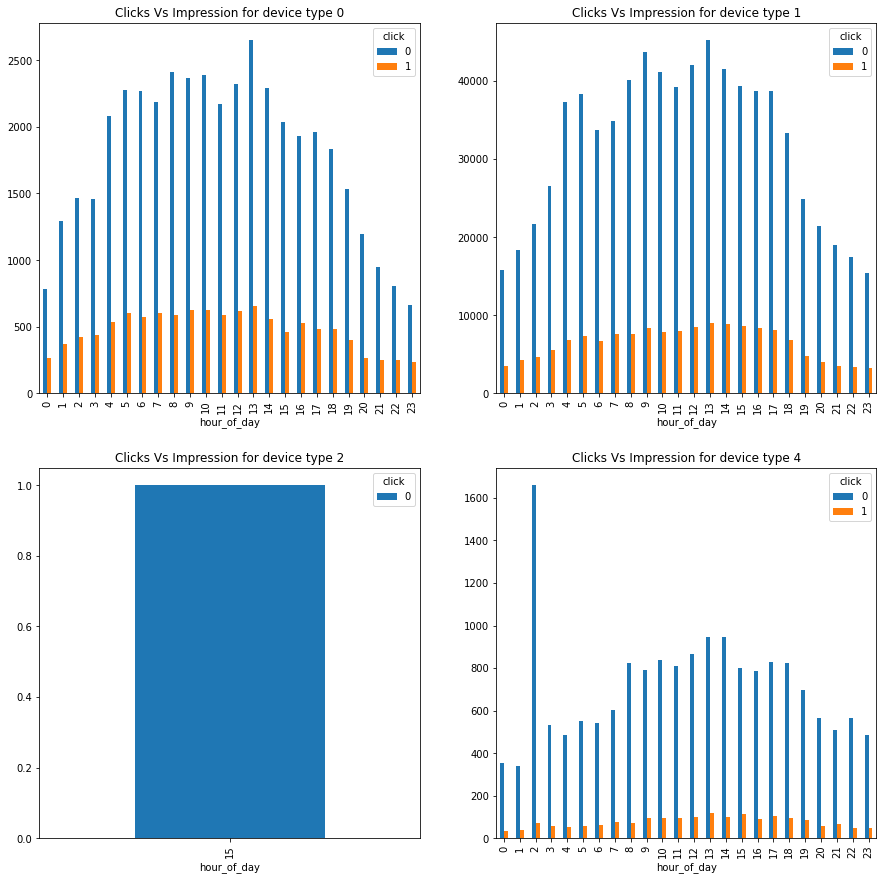

In [26]:
devices = sorted(train["device_type"].unique())

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i,j in zip(devices,axes):
    df = train[train["device_type"]==i]
    df=df.groupby(['hour_of_day', 'click']).size().unstack()
    df.plot(kind="bar",ax=j)
        
    j.set_title("Clicks Vs Impression for device type " + str(i))

In [27]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

#The highest CTR comes from device type 0

# Using the same way, We can explore all the other categorical features such as site features, app features and C14-C21 features.

,device_type,click,impressions,CTR
0,0,11455,54764,20.917026
1,1,155651,922995,16.863688
2,4,1829,18977,9.637983
3,5,318,3263,9.745633


### Building Model

### Dealing with Categorical Features

In [28]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,day_of_week
0,10000169349117863715,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15704,320,50,1722,0,35,100084,79,0,Tuesday
1,10000640724480838376,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15706,320,50,1722,0,35,100084,79,0,Tuesday
2,10007163879183388340,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,18993,320,50,2161,0,35,-1,157,0,Tuesday
3,1001139595064240144,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15705,320,50,1722,0,35,-1,79,0,Tuesday
4,10020492815188881068,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15699,320,50,1722,0,35,-1,79,0,Tuesday


In [29]:
# So,the columns are categorical with high number of varied values, where as the anonymised columns are int
for col in train:
    print (col.ljust(15),train.dtypes[col], train[col].nunique())

id              uint64 1000000
click           int64 2
hour            datetime64[ns] 240
C1              int64 7
banner_pos      int64 7
site_id         object 2646
site_domain     object 2842
site_category   object 22
app_id          object 3071
app_domain      object 200
app_category    object 25
device_id       object 150041
device_ip       object 556323
device_model    object 5179
device_type     int64 5
device_conn_type int64 4
C14             int64 2238
C15             int64 8
C16             int64 9
C17             int64 420
C18             int64 4
C19             int64 65
C20             int64 164
C21             int64 60
hour_of_day     int64 24
day_of_week     object 7


A hash function is a function that maps a set of objects to a set of integers. When using a hash function, this mapping is performed which takes a key of arbitrary length as input and outputs an integer in a specific range.
Our reduced dataset still contains 1M samples and ~2M feature values. The purposes of the hashing is to minimize memory consumption by the features.

In [30]:


def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [31]:
train.head()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,10000169349117863715,0,2014-10-21,1005,0,1,0,15704,320,50,...,5863489908679706865,-2222713343893501018,-3358374613078153344,8880594413312066321,-1481770075807904803,-5905652377203361743,-3395986127377041583,8884884024544312300,-3278477884831381928,-3640360043006920132
1,10000640724480838376,0,2014-10-21,1005,0,1,0,15706,320,50,...,5863489908679706865,-2222713343893501018,-3358374613078153344,8880594413312066321,-1481770075807904803,-5905652377203361743,-3395986127377041583,-4563838589813185946,-9109524434741583731,-3640360043006920132
2,10007163879183388340,0,2014-10-21,1005,0,1,0,18993,320,50,...,7536159465941823856,9026784911573319236,7781818494985880217,8880594413312066321,-1481770075807904803,-5905652377203361743,-3395986127377041583,-7156629758523828777,7215152627744653208,-3640360043006920132
3,1001139595064240144,0,2014-10-21,1005,0,1,0,15705,320,50,...,5863489908679706865,-2222713343893501018,-3358374613078153344,8880594413312066321,-1481770075807904803,-5905652377203361743,-3395986127377041583,-6024283543316706854,-3447213961874211028,-3640360043006920132
4,10020492815188881068,1,2014-10-21,1005,0,1,0,15699,320,50,...,5863489908679706865,-2222713343893501018,-3358374613078153344,8880594413312066321,-1481770075807904803,-5905652377203361743,-3395986127377041583,-7088700142776115995,6048812511580516507,-3640360043006920132


In [33]:
# We have noticed that this dataset is highly imbalanced
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# shuffling
train = train.sample(frac=1)


### Random Undersampling

In [37]:
train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'hour_of_day', 'site_id_int', 'site_domain_int',
       'site_category_int', 'app_id_int', 'app_domain_int', 'app_category_int',
       'device_id_int', 'device_ip_int', 'device_model_int',
       'day_of_week_int'],
      dtype='object')

In [36]:
# SInce this is a big dataset, I did undersampling

click_df = train.loc[train['click'] == 1]
non_click_df = train.loc[train['click'] == 0][:len(click_df)]

df_final = pd.concat([click_df, non_click_df]).sample(frac=1)

X= df_final.drop(["click","id","hour","device_id_int","device_ip_int"], axis=1)
y=df_final[["click"]]


In [38]:
X.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,C21,hour_of_day,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_model_int,day_of_week_int
722739,1005,1,1,0,19771,320,50,2227,0,935,...,48,11,-3675498240829519657,-7210764970694519476,-3581434878649259693,8880594413312066321,-1481770075807904803,-5905652377203361743,-2086578744619773070,-3640360043006920132
229264,1005,1,1,0,17262,320,50,1872,3,39,...,23,22,-153564631341358977,-293706933020317603,-3581434878649259693,8880594413312066321,-1481770075807904803,-5905652377203361743,6048812511580516507,-6668523447571730428
296045,1005,0,1,0,15702,320,50,1722,0,35,...,79,14,5863489908679706865,-2222713343893501018,-3358374613078153344,8880594413312066321,-1481770075807904803,-5905652377203361743,2749481910904368193,5662844345551748307
433431,1005,0,1,0,8330,320,50,761,3,175,...,23,9,-5120164601742708851,8736773455416762975,-3581434878649259693,8880594413312066321,-1481770075807904803,-5905652377203361743,-2234824407688298095,-7070568433802725168
625368,1005,0,1,0,15706,320,50,1722,0,35,...,79,11,5863489908679706865,-2222713343893501018,-3358374613078153344,8880594413312066321,-1481770075807904803,-5905652377203361743,1402439719242139493,-1394138205109104105


In [39]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Hyper Parameter Tuning

In [42]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoost Classifier":GradientBoostingClassifier(),
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

gbc_params={    
    "learning_rate": [0.01, 0.1,  0.2],
        "max_depth":[3,8],    
    "criterion": ["friedman_mse",  "mae"]   }

gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)
gbc.fit(X_train, y_train)

gbc_clf = gbc.best_estimator_